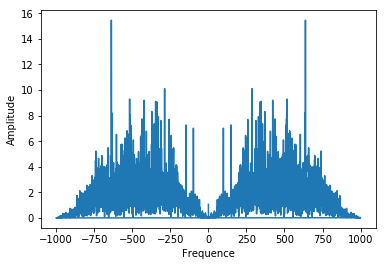

18000
18000


In [65]:
import random
import numpy as np
import aifc
import csv
import pandas as pd
import sys
import matplotlib.pyplot as plt

def extract_file():
    df = pd.read_csv('train.csv', header=0, sep=',')
    df.columns=['sample', 'label'] 
    return df
    
def pourc(tl, pourc):
    return pourc*tl/100

def create_label():
    df = extract_file()
    label_list = []
    for i in range(len(df)):
        label_list.append(df['label'][i])
    return label_list

def split_our_lists():
    train = []
    validation = []
    test = []
    label_list = create_label()
    random.shuffle(label_list)
    tl = len(label_list)
    
    for i in range(tl):
        if i < pourc(tl,60):
            train.append(label_list[i])
        elif i < pourc(tl,80):
            validation.append(label_list[i])
        else:
            test.append(label_list[i])
    return train, validation, test


def show_signal(filename):
    liste_sample_fft = []
    s = aifc.open('Data/train/' + filename, "r")
    N = s.getnframes()
    strsig = s.readframes(N)
    y = np.fromstring(strsig, np.short).byteswap()
    FE = s.getframerate()
    A = np.fft.fft(y)
    DeltaT = 1./FE
    ampl = np.abs(A)*1./N
    freqs = np.fft.fftfreq(N, DeltaT)
    P = plt.plot(freqs, ampl) 
    plt.ylabel("Amplitude")
    plt.xlabel("Frequence")
    plt.show()

def fct_FFT(filename) :
    liste_sample_fft = []
    s = aifc.open('Data/train/' + filename, "r")
    N = s.getnframes()
    strsig = s.readframes(N)
    y = np.fromstring(strsig, np.short).byteswap()
    FE = s.getframerate()
    A = np.fft.fft(y)
    DeltaT = 1./FE
    ampl = np.abs(A)*1./N
    liste_sample_fft.append(ampl)
    return liste_sample_fft

def Parcours_file_fft(listname):
    df = extract_file() 
    df_train = []
    for i in range(len(listname)):
        df_train.append(fct_FFT(df["sample"][i]))
    return df_train

liste = split_our_lists()
show_signal("train2.aiff")
Parcours_file_fft(liste[0])